# Linear Regression 
In this notebook we create and apply a linear regression model.

We import the modules that are required to solve all exercises

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import t

> Answer the questions in the ILIAS quiz **Linear Regression**.

## Part 1 - Simple Linear Regression: Disk I/O vs. CPU Time
We consider the simple example from the slides where we compute the regression line for the disk I/O and CPU time.

In [2]:
x = np.array([14, 16, 27, 42, 83, 50, 39])
y = np.array([2, 5, 7, 9, 20, 13, 10])

Let's display the datapoints in a scatter plot.

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'CPU Time')

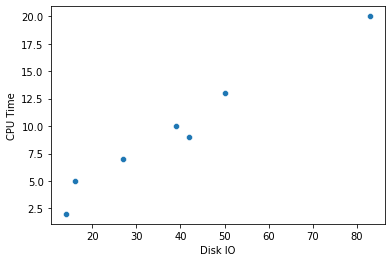

In [3]:
ax = sns.scatterplot(x, y)
ax.set_xlabel("Disk IO")
ax.set_ylabel("CPU Time")

### Calculate the Pearson Correlation Coefficient
$r = \frac{s_{xy}}{s_{x}s_{y}}$
> Start by calculating the pearson correlation coefficient $r$.

In [43]:
def corr(x, y):
    # START YOUR CODE
    sxy = np.sum((x - np.mean(x))*(y - np.mean(y)))
    sy = np.sqrt(np.sum((y - np.mean(y))**2))
    sx = np.sqrt(np.sum((x - np.mean(x))**2))
    r = sxy/(sy*sx)    
    # END YOUR CODE
    return r

In [5]:
def corr(x, y):
    Sxy = np.sum((X - np.mean(X)) * (y - np.mean(y)))
    SxSy = np.sqrt(np.sum((X - np.mean(X))**2)) * np.sqrt(np.sum((y - np.mean(y))**2))
    r = Sxy / SxSy
    return r

In [5]:
r = corr(x, y)
r

0.9856321341091975

The samples almost perfectly lie on a line. We're ready to estimate the model parameters $\theta_0$ and $\theta_1$.

### Estimate model parameters


> Implement the `fit` method to estimate the model parameters $\theta_1$ and $\theta_2$.


$\theta_1 = \frac{S_{xy}}{S_{xx}}$

$\theta_0 = \bar{y} - \theta_1 \bar{x}$


In [44]:
def fit(x, y):
    #START YOUR CODE
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    Sxx = np.sum((x-mean_x)**2)
    Sxy = np.sum((x-mean_x)*(y-mean_y))
    
    theta1 = Sxy/Sxx
    theta0 = mean_y - theta1*mean_x
    
    # END YOUR CODE
    return theta0, theta1

In [ ]:
def fit(X, y):
    Sxy = np.sum((X - np.mean(X))*(y - np.mean(y)))
    Sxx = np.sum((X - np.mean(X))**2)
    
    theta1 = Sxy / Sxx
    theta0 = np.mean(y) - theta1 * np.mean(X)
    return theta0, theta1

In [7]:
theta0, theta1 = fit(x, y)
print("Theta 0:", theta0)
print("Theta 1:", theta1)

Theta 0: -0.008282364933741349
Theta 1: 0.24375637104994904


### Predict function
> Now implement the `predict` function which calculates the prediction based on the estimated parameters $\theta_0$ and $\theta_1$.

In [45]:
def predict(x, theta0, theta1):
    # y_pred = ...
    y_pred = theta0 + theta1*x
    
    return y_pred

In [ ]:
def predict(X, theta0, theta1):
    y_pred = theta0 + theta1 * X
    return y_pred

In [9]:
y_pred = predict(x, theta0, theta1)
y_pred

array([ 3.40430683,  3.89181957,  6.57313965, 10.22948522, 20.22349643,
       12.17953619,  9.49821611])

### Plot regression line
We can now plot the regression line

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


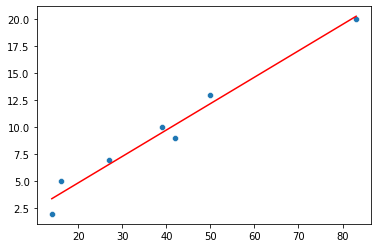

In [10]:
def plot_regression_line(X, theta0, theta1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.arange(X.min(), X.max()+0.1, 0.01).reshape(-1,1)
    y_pred = predict(x, theta0, theta1)
    
    ax.plot(x, y_pred, color="r")
    
ax = sns.scatterplot(x, y)
plot_regression_line(x, theta0, theta1, ax)
plt.show()

### Calculate the $R^2$ score and the $MSE$
In case of linear regression, the coefficient of determination $R^2$ is defined as the fraction of explained variance by the model.

It is calculated the following way: $R^2 = 1 - \frac{SSE}{SST}$

#### Calculate the Sum of Squared Errors $SSE$

In [46]:
def SSE(y, y_pred):
    return np.sum((y - y_pred)**2)

In [12]:
SSE(y, y_pred)

5.868883792048929

#### Calculate the $MSE$
> Calculate the $MSE$ using the $SSE$.

In [47]:
def MSE(y, y_pred):
    SSE_ = SSE(y, y_pred)
    MSE = SSE_ / (len(y)-2)
    return MSE

In [ ]:
def MSE(y, y_pred):
    return SSE(y, y_pred) / (len(y) -2)

In [14]:
MSE(y, y_pred)

1.1737767584097858

#### Calculate the Total Sum of Squares $SST$

In [48]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

In [ ]:
def SST(y):
    return np.sum((y - np.mean(y))**2)

In [41]:
SST(y)

53637.26530612244

#### Calculate the $R^2$ score
$R^2 = 1 - \frac{SSE}{SST}$

In [49]:
def r2(y, y_pred):
    sst = SST(y)
    sse = SSE(y, y_pred)
    r2 = 1 - (sse/sst)
    return r2

In [23]:
def r2(y, y_pred):
    sse = SSE(y, y_pred)
    sst = SST(y)
    return 1 - sse / sst

In [26]:
r2(y, y_pred)

0.9714707037886511

#### Using Scikit-Learn
Of course in a real project you would never implement these metrices yourself as Scikit-Learn already provides them.

*Note*: to compute the $MSE$, Scikit-Learn does not divide the Sum of Squared Errors $SSE$ by $n-2$ degress of freedom but by $n$. With a large dataset this would not make a big difference. However, in our toy example the result is completely different.

In [27]:
R2 = r2_score(y, y_pred)
MSE_sklearn = mean_squared_error(y, y_pred)

print ("R^2: ", R2)
print ("MSE Sklearn: ", MSE_sklearn)

R^2:  0.9714707037886511
MSE Sklearn:  0.8384119702927041


### Confidence interval for $\theta_0$ and $\theta_1$
We want to compute the 95% confidence interval for our model parameters $\theta_0$ and $\theta_1$. A 95% confidence interval is defined as a range of values such that with 95% probability, the range will contain the true unknown value of the parameter. The range is defined in terms of lower and upper limits computed from the training data.

#### Standard Deviation
In order to calculate the confidence interval for our regression coefficients we first need to calculate the standard deviations.

In [28]:
x_mean = np.mean(x)
y_pred = predict(x, theta0, theta1)
mse = MSE(y, y_pred)

# calculate standard deviations
n = len(x)
S_theta0 = np.sqrt(mse) * np.sqrt((1 / n) + (x_mean ** 2) / (np.sum(x ** 2) - n * x_mean ** 2))
S_theta1 = np.sqrt(mse) / np.sqrt(np.sum(x ** 2) - n * x_mean ** 2)

print('S_theta0:', S_theta0)
print('S_theta1:', S_theta1)

S_theta0: 0.8311049969529885
S_theta1: 0.018681065725824817


#### 90% Confidence Interval
To compute the 90% confidence interval we use the $0.95$ quantile of a student-t distribution with $n-2$ degrees of freedom. We could either use a table of the student-t distribution from [wikipedia](https://de.wikipedia.org/wiki/Studentsche_t-Verteilung) or use the interval function from [scipy.stats.t](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

Using scipy, we can calculate the $0.95$ quantile using the `ppf` function.

In [29]:
t.ppf(0.95, n-2)

2.015048372669157

The confidence interval can be calculated using the `t.interval` function which takes as arguments the probability that the value falls within this range, the degrees of freedom, the theta value and the standard deviation.

In [30]:
alpha = 0.10
ts_theta_0 = t.interval(1 - alpha, n - 2, loc=theta0, scale=S_theta0)
ts_theta_1 = t.interval(1 - alpha, n - 2, loc=theta1, scale=S_theta1)
print(ts_theta_0)
print(ts_theta_1)

(-1.6829991365610661, 1.6664344066935828)
(0.20611311995940018, 0.2813996221404979)


Because zero is contained in the confidence interval, we can conclude that the intercept $\theta_0$ is not significant!

### Outlier
We received a new datapoint $(15, 17)$.

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'CPU Time')

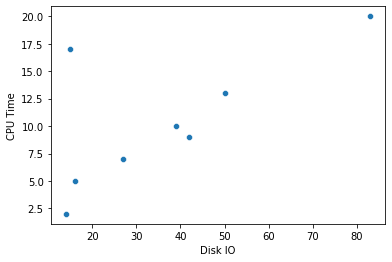

In [31]:
x = np.array([14, 16, 27, 42, 83, 50, 39, 15])
y = np.array([2, 5, 7, 9, 20, 13, 10, 17])

ax = sns.scatterplot(x, y)
ax.plot(15, 17)
ax.set_xlabel("Disk IO")
ax.set_ylabel("CPU Time")

> Recalculate the model parameters and plot the new regression line.

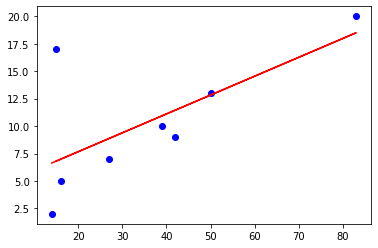

theta_1: 0.1718972895863053
theta_0: 4.2296718972895855
Interval theta0: [-4.216137688596834 ; 12.675481483176004]
Interval theta1: [-0.029421797314557435 ; 0.373216376487168]


In [32]:
# Recalculate the model parameters and plot the new regression line.

mean_x = np.mean(x)
mean_y = np.mean(y)

Sxx = np.sum((x-mean_x)**2)
Syy = np.sum((y-mean_y)**2)
Sxy = np.sum((x-mean_x)*(y-mean_y))

thet1 = Sxy/Sxx
thet0 = mean_y-thet1*mean_x

# To show the regression line
plt.plot(x,y, 'bo')
plt.plot(x,thet0+thet1*x, 'r')
plt.show()

hat_y = thet0+thet1*x

SSE=np.sum(((y-hat_y))**2)

SSR=np.sum((hat_y-mean_y)**2)

SST = SSE + SSR

R_sq = SSR/SST

MSE = SSE/(len(x)-2)

Sthet0 = np.sqrt(MSE)*np.sqrt((1/len(x))+(mean_x**2)/(np.sum((x-mean_x)**2)))

Sthet1 = (np.sqrt(MSE))*np.sqrt(1/(np.sum((x-mean_x)**2)))

print("theta_1: " + str(thet1))

print("theta_0: " + str(thet0))

print("Interval theta0: [" + str(thet0 - (2.57*Sthet0)) + " ; " + str(thet0 + (2.57*Sthet0)) + "]")

print("Interval theta1: [" + str(thet1 - (2.57*Sthet1)) + " ; " + str(thet1 + (2.57*Sthet1)) + "]")



## Frage 1
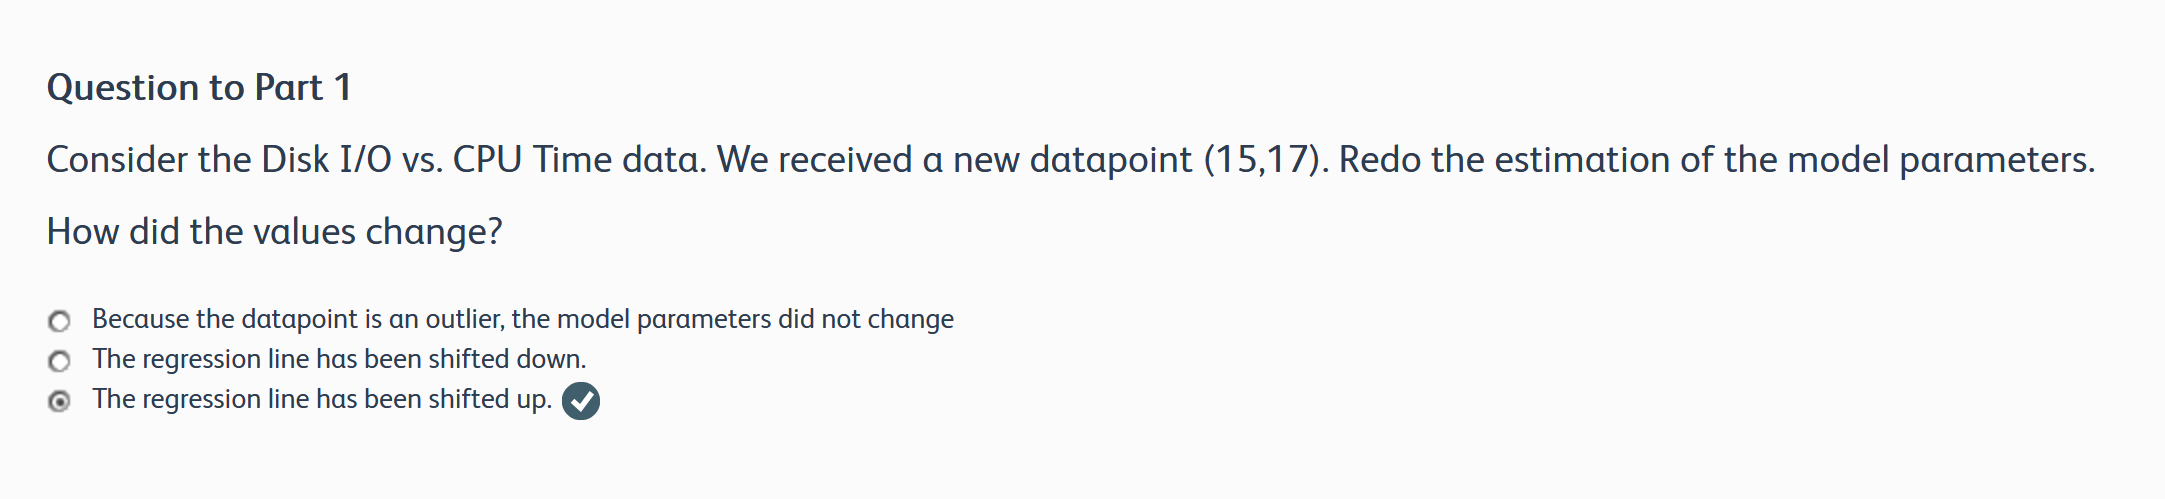

## Part 2 - Skin Cancer Mortality vs. State Latitude
Let's consider the Skin cancer example from the slides. Your goal is to predict the amount of skin cancer mortality given the latitude.

In [33]:
df = pd.read_csv("SkinCancerMortalityUSA1950.csv", sep=";")
df.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


> Split the dataset into features and target

In [34]:
x = df[["Lat"]].values
y = df[["Mort"]].values

In [ ]:
X = df[["Lat"]].values
y = df[["Mort"]].values

> Fit a linear regression model to the data. This time use the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) implementation from Scikit-Learn.

In [50]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X, y)

> Calculate the $R^2$ score using our implementation

In [51]:
y_pred = model.predict(x)
R2 = r2(y, y_pred)
R2

0.6798295922599593

In [38]:
y_pred = model.predict(x)
R2 = r2(y, y_pred)
R2

TypeError: 'numpy.float64' object is not callable

> Now use the Longitude instead of the Latitude feature. What $R^2$ score do you achieve? Answer the question on ILIAS.

In [52]:
# Now use the Longitude instead of the Latitude feature
x = df[["Long"]].values
y = df[["Mort"]].values

model = LinearRegression()
model.fit(x,y)

theta0, theta1 = fit(x, y)
y_pred = predict(x, theta0, theta1)
R2 = r2(y, y_pred)
R2

# Logisch dass R2 nahe bei 0 ist, wenn wir Breitengrade nutzen, da alle auf demselben Breitengrad gleich viel Sonne haben

0.021370967192338663

## Frage 2
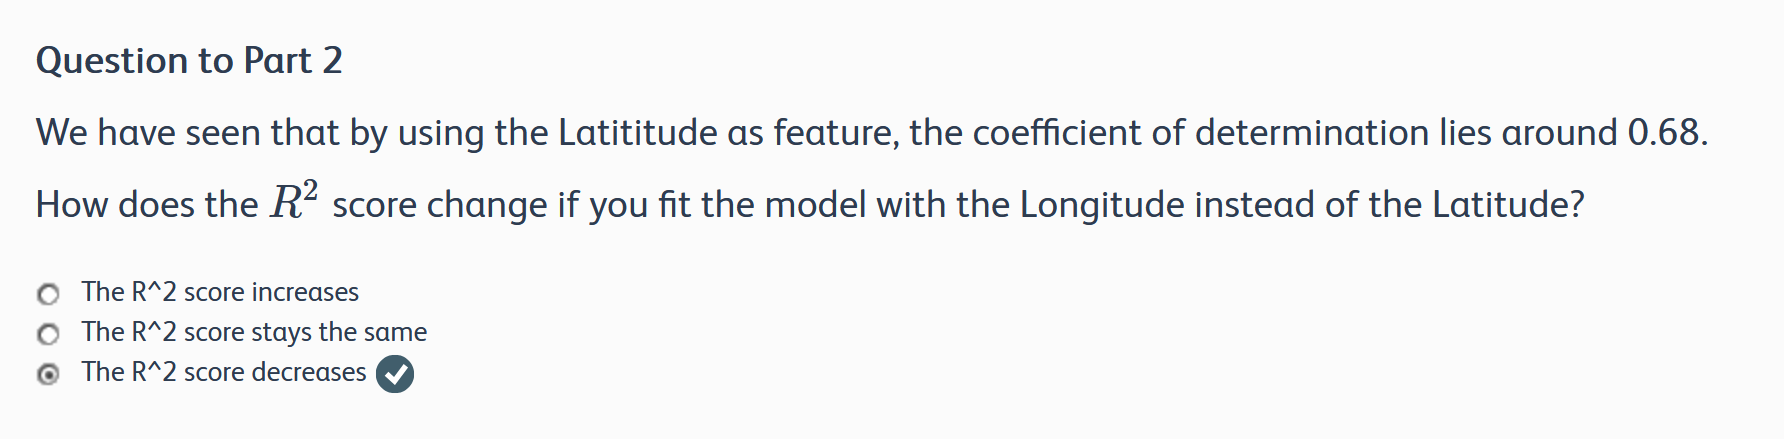

## Part 3 - Simple Linear Regression using  the AutoScout Dataset
We move now to a much bigger dataset, the AutoScout 24 dataset.

### Data Quality Assessment
Here is the the dataset from Autoscout24. We reuse the steps that we developed in the regression exercise to read and clean the data:

In [53]:
df = pd.read_csv('cars.csv')
df.drop(['Name', 'Registration'], axis='columns', inplace=True)
df.drop([17010, 7734, 47002, 44369, 24720, 50574, 36542, 42611,
         22513, 12773, 21501, 2424, 52910, 29735, 43004, 47125], axis='rows', inplace=True)
df.drop(df.index[df.EngineSize > 7500], axis='rows', inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,Price,Mileage,Color,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year
0,44800,27600,anthrazit,2,320,4973,2,8,5,1996
1,22800,18300,anthrazit,4,286,4398,5,8,5,1999
2,183710,650,anthrazit,5,350,4172,5,8,6,2008
3,19900,32000,anthrazit,5,150,2198,7,4,6,2006
4,18999,118000,anthrazit,5,163,2401,5,5,5,2003


#### Handle categorical variables
As color is a categorical variable, we need to one-hot encode it.

In [54]:
df = pd.get_dummies(df)
df.head()

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
0,44800,27600,2,320,4973,2,8,5,1996,1,...,0,0,0,0,0,0,0,0,0,0
1,22800,18300,4,286,4398,5,8,5,1999,1,...,0,0,0,0,0,0,0,0,0,0
2,183710,650,5,350,4172,5,8,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
3,19900,32000,5,150,2198,7,4,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
4,18999,118000,5,163,2401,5,5,5,2003,1,...,0,0,0,0,0,0,0,0,0,0


#### Split into train and test

In [55]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

#### Handle outliers

Outliers are in particular critical for linear models. Therefore, we remove all rows corresponding to outliers of the dependent variable and to outliers of all independent variables, which strongly correlate with the dependent variable. Note that you should determine all outliers on the same dataset, i.e. do not determine outliers for a certain variable on a dataset, where you have already removed outliers corresponding to other variables. 


Price            AxesSubplot(0.125,0.536818;0.352273x0.343182)
Mileage       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Horsepower          AxesSubplot(0.125,0.125;0.352273x0.343182)
EngineSize       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

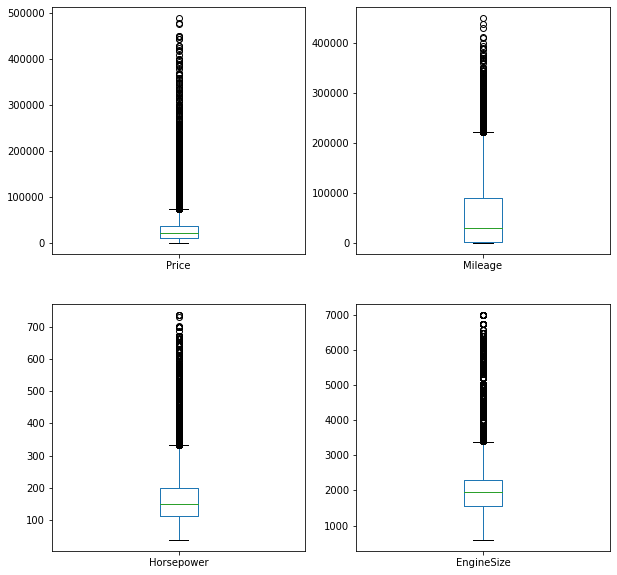

In [56]:
numerical_cols = ['Price', 'Mileage', 'Horsepower', 'EngineSize']
df.loc[:, numerical_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 10), sharex=False)

With the following code we calculate an upper bound. This must be calculated **only on the training set**, not on the complete dataset. In a dataset where there are outliers above as well as below the two quartiles, the lower bound would have to be calculated accordingly

In [57]:
q3 = train.loc[:, numerical_cols].describe().loc['75%']
iqr = q3 - df.loc[:, numerical_cols].describe().loc['25%']
upper_boundary = q3 + 1.5*iqr
upper_boundary

Price          73884.375
Mileage       222750.000
Horsepower       332.000
EngineSize      3470.000
dtype: float64

With the calculated upper bound we then remove the outliers.

In [58]:
# And here the outliers are removed
train = train[(train.Price <= upper_boundary.Price) &
        (train.Mileage <= upper_boundary.Mileage) &
        (train.Horsepower <= upper_boundary.Horsepower) &
        (train.EngineSize <= upper_boundary.EngineSize)]

test = test[(test.Price <= upper_boundary.Price) &
        (test.Mileage <= upper_boundary.Mileage) &
        (test.Horsepower <= upper_boundary.Horsepower) &
        (test.EngineSize <= upper_boundary.EngineSize)]

#### Check the correlations
Next, we check the correlations between the variables

In [59]:
df.head()

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
0,44800,27600,2,320,4973,2,8,5,1996,1,...,0,0,0,0,0,0,0,0,0,0
1,22800,18300,4,286,4398,5,8,5,1999,1,...,0,0,0,0,0,0,0,0,0,0
2,183710,650,5,350,4172,5,8,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
3,19900,32000,5,150,2198,7,4,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
4,18999,118000,5,163,2401,5,5,5,2003,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
features = ['Price', 'Mileage', 'Horsepower', 'EngineSize', 'Seats', 'Cylinders', 'Gears', 'Year']
corr = train[features].corr()
corr

,Price,Mileage,Horsepower,EngineSize,Seats,Cylinders,Gears,Year
Price,1.000000,-0.614035,0.516171,0.286597,0.071034,0.170101,0.585866,0.635632
Mileage,-0.614035,1.000000,0.045645,0.281828,0.032866,0.250388,-0.315554,-0.842329
Horsepower,0.516171,0.045645,1.000000,0.801584,0.054728,0.637440,0.377716,-0.007443
EngineSize,0.286597,0.281828,0.801584,1.000000,0.155374,0.794124,0.174822,-0.252623
Seats,0.071034,0.032866,0.054728,0.155374,1.000000,0.067493,0.049172,0.061743
Cylinders,0.170101,0.250388,0.637440,0.794124,0.067493,1.000000,0.116424,-0.252124
Gears,0.585866,-0.315554,0.377716,0.174822,0.049172,0.116424,1.000000,0.399503
Year,0.635632,-0.842329,-0.007443,-0.252623,0.061743,-0.252124,0.399503,1.000000


> Now plot the correlation matrix. What is the perason correlation between price and horsepower?

<AxesSubplot:>

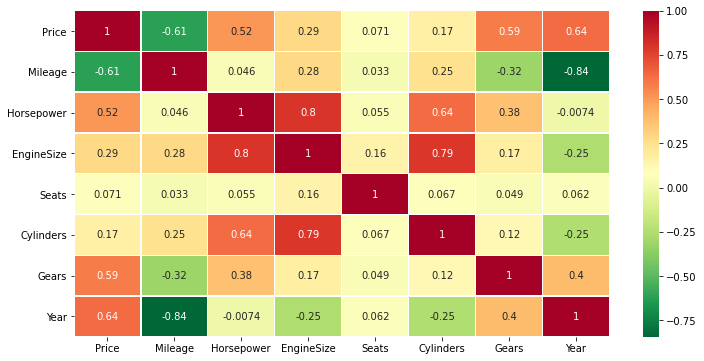

In [61]:
# plot the correlation matrix
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='RdYlGn_r', linewidths=0.5)

In [ ]:
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='RdYlGn_r', linewidths=0.5)

### Simple Linear Regression

We start with simple linear regression, where we have only one feature. Our goal is to predict the price from a car based on the horsepower. In our correlation analysis we have seen that the price is positively correlated with the horsepower.

In [62]:
X_train = train[["Horsepower"]].values
X_test = test[["Horsepower"]].values

y_train = train.Price.values
y_test = test.Price.values

We display our datapoints in a scatter plot.

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Price')

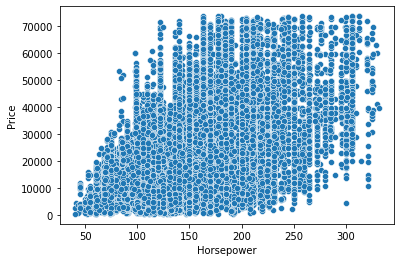

In [63]:
ax = sns.scatterplot(X_train.reshape(-1), y_train)
ax.set_xlabel("Horsepower")
ax.set_ylabel("Price")

#### Estimate model parameters
> Fit a linear regression model to our data and print the model parameters. 

*Hint*: $\theta_0$ can be accessed by means of the `intercept_` attribute and $\theta_1$ with the `coef_` attribute.

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

#theta0, theta1 = fit(X_train, y_train)

theta0 = model.intercept_
theta1 = model.coef_[0]

print("Theta 0:", theta0)
print("Theta 1:", theta1)

Theta 0: 522.370155900855
Theta 1: 157.78088729613742


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

theta0 = model.intercept_
theta1 = model.coef_[0]
print("Theta 0:", theta0)
print("Theta 1:", theta1)

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


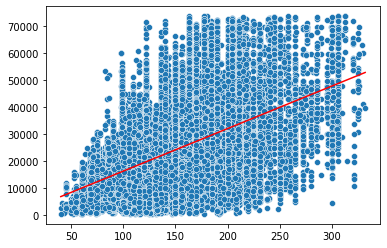

In [65]:
ax = sns.scatterplot(X_train.reshape(-1), y_train)
plot_regression_line(X_train, theta0, theta1, ax)
plt.show()

#### Measure the model performance
> Predict the price on the test set and calculate the $R^2$ score.

In [66]:
y_pred = model.predict(X_test)
R2 = r2(y_test, y_pred)
print ("R^2: ", R2)

R^2:  0.2688862591352963


## Part 4 -  Multiple Linear Regression using the AutoScout Dataset

Okay, it seems like the feature horsepower alone is not sufficient enough. Let's use some more features.
In this part we will implement a multiple linear regression model from scratch using the formulas from the slides.

In [67]:
train.head()

,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
35105,20550,34500,5,180,1390,5,4,7,2011,0,...,0,0,0,0,0,1,0,0,0,0
27905,11900,82000,5,87,1298,5,4,5,2008,0,...,0,0,0,0,0,1,0,0,0,0
4588,9700,32000,5,101,1149,5,4,5,2009,0,...,0,0,0,0,0,0,0,0,0,0
47935,22500,18600,5,110,1461,5,4,6,2012,0,...,0,0,0,0,0,0,1,0,0,0
45236,12900,115000,2,150,1984,4,4,6,2006,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
X_train = train.drop(columns=["Price"]).values
X_test = test.drop(columns=["Price"]).values

y_train = train.Price.values
y_test = test.Price.values

### Estimate model parameters
Define a linear regression function to estimate the parameters $\theta$ based on the normal equation:
  
  $\Theta:=(X^{\top}X)^{-1}(X^{\top}y)$
  
  > Implement the `fit` function

In [70]:
def fit(X, y):
    # Add bias to our X
    X = np.c_[np.ones((len(X), 1)), X]
    # START YOUR CODE
    thetas = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    
    # END YOUR CODE
    return thetas

In [4]:
X = np.matrix([[2,1.1],[2,1.9],[4,2.0],[5,1.5],[6,1.3],[7,2.1],[4,1.8],[5,2.5]])

# Anzahl Reihen von X anhand der ersten Zeile (= Anzahl Beobachtungen)
n = X.shape[0]

y = np.array([93,106,146,140,151,158,130,159])

 # Append a column of '1' infront of the X-matrix (to get the 'X'-matrix from the

X_est = np.c_[np.ones((n,1)),X]

theta = np.linalg.inv(X_ext.T.dot(X_est)).dot(X_ext.T).dot(y)

In [69]:
def fit(X, y):
    # Add bias to our X
    X = np.c_[np.ones((len(X), 1)), X]
    
    thetas = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return thetas

In [71]:
thetas = fit(X_train, y_train)
thetas

array([-6.47182366e+00, -1.58902645e-01,  4.32254971e+01,  1.05605332e+02,
        6.07596625e+00,  6.42641424e+02, -2.10490843e+03,  4.53564858e+03,
       -7.85084530e+00, -8.42790844e+02, -4.97258886e+02, -3.82242304e+02,
       -2.17070424e+03,  3.22891243e+03, -6.51487905e+02,  2.40704310e+03,
       -4.04197473e+02, -1.33347681e+02,  2.87158182e+02, -1.58618335e+03,
       -1.15305462e+03,  1.43890462e+03, -4.47646813e+02, -6.56906885e+02,
       -2.99462138e+02,  1.85679149e+03])

#### Predict prices
> Implement the `predict` function which takes the features `X` and the model parameters $\Theta$ as input.

In [72]:
def predict(X, thetas):
    # Add bias column
    X = np.c_[np.ones((len(X), 1)), X]
    # START YOUR CODE

    y_pred = X.dot(thetas)
     
    
    # END YOUR CODE
    return y_pred

In [86]:
def predict(X, thetas):
    X = np.c_[np.ones((len(X), 1)), X]
    y_pred = np.dot(X, thetas)
    return y_pred

In [73]:
y_pred = predict(X_test, thetas)
y_pred

array([43224.36967592, 25339.11311951, 27221.21663214, ...,
        6179.09851465,  6564.78301739, 18722.28215694])

No we want to calculate the $R^2$ score and the $MAE$ on the test set.

In [74]:
R2 = r2(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print ("R^2: ", R2)
print ("MAE: ", MAE)

R^2:  0.7328768844938511
MAE:  6037.312440973635


We get a much higher $R^2$ score with more than one feature!

### Use Scikit-Learn implementation
Let's move to the Scikit-Learn implementation [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and check if we get the same results.

> Fit a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model.

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In Scikit-Learn we can access the thetas by means of the attribute `coef_`.

In [76]:
model.coef_

array([-1.01812766e-01, -4.31230577e+02,  9.75579915e+01,  6.90334638e+00,
        4.79169274e+02, -1.74078478e+03,  3.85633201e+03,  1.01328963e+03,
       -1.42129031e+03, -7.22969224e+02, -1.46795669e+02, -7.94327692e+02,
        2.40687004e+03, -1.96202749e+02,  2.23373399e+03, -7.45654154e+02,
        1.84604896e+03, -4.98579780e+02, -1.65831890e+03, -9.58844885e+02,
        7.62306210e+02, -5.18905869e+02, -5.58389281e+02,  1.07444195e+02,
        8.63875109e+02])

The bias parameter $\theta_0$ can be accessed by means of the attribute `intercept_`

In [77]:
model.intercept_

-2049035.0033218411

#### Predict prices

In [78]:
y_pred = model.predict(X_test)
y_pred

array([42903.54301549, 25267.55352846, 25959.90490875, ...,
        7438.08437877,  3210.02906391, 18377.71956115])

Again we calculate the $R^2$ score and the $MAE$.

In [79]:
R2 = r2(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print ("R^2: ", R2)
print ("MAE: ", MAE)

R^2:  0.7517309417567082
MAE:  5812.90835942592


With the scikit-learn implementation we get a slightly better result.

#### Plot predictions vs the actual values
Let us visualize the predictions by means of a scatter plot. The scatter plot displays the predicted and actual values as data points, where the first coordinate of each point is given by the actual value and the second by the predicted value.

Text(0, 0.5, 'Actual values')

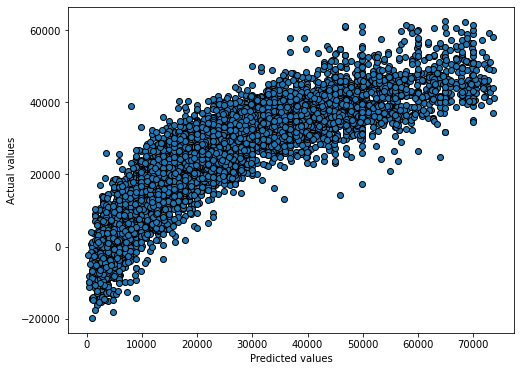

In [80]:
plt.figure(2, figsize=(8, 6))
plt.scatter(y_test, y_pred,  cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

## Part 5 -  Simple Linear Regression using the House Price Dataset
We now move to the house price dataset and we fit a simple linear regression model to predict a price based on the size of the house.

In [81]:
df = pd.read_csv("house_prices.csv")
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


> Compute the pearson correlation between the features size and price.

In [82]:
df.describe()
X = df[["Size"]].values
y  = df[["Price"]].values

def corr(x, y):
    # START YOUR CODE
    sxy = np.sum((x - np.mean(x))*(y - np.mean(y)))
    sy = np.sqrt(np.sum((y - np.mean(y))**2))
    sx = np.sqrt(np.sum((x - np.mean(x))**2))
    r = sxy/(sy*sx)    
    # END YOUR CODE
    return r

pearson_corr = corr(X,y)
pearson_corr

0.8549875928781253

## Frage 3
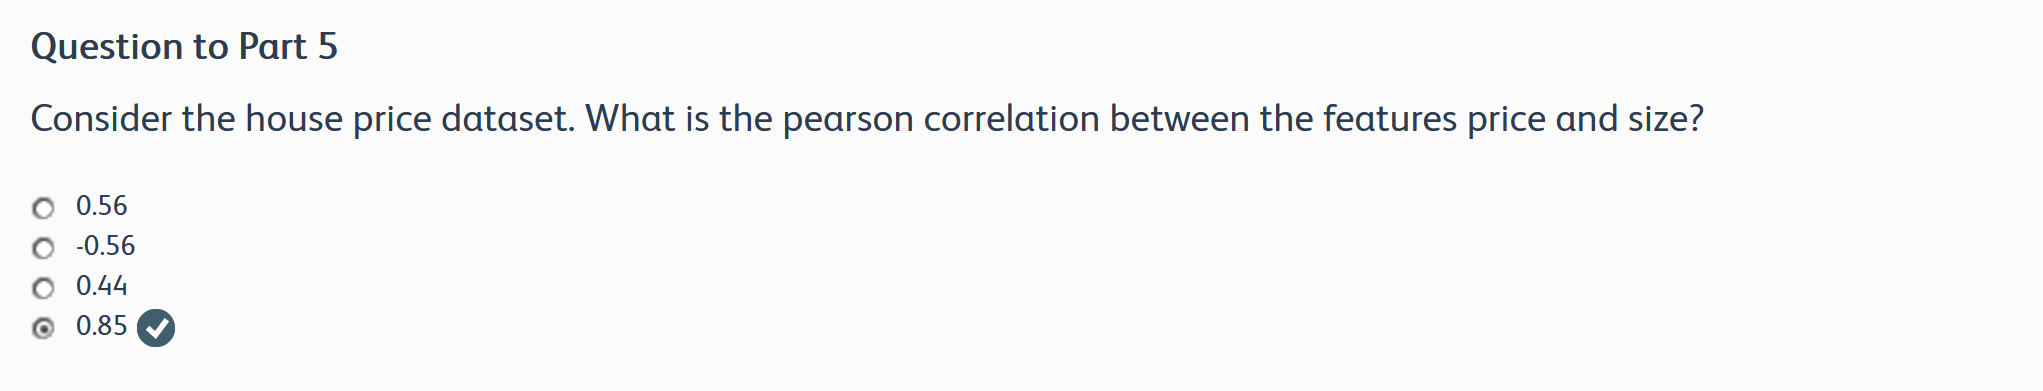

We now split the data into a training and test set.

In [83]:
X = df[["Size"]].values
y  = df[["Price"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

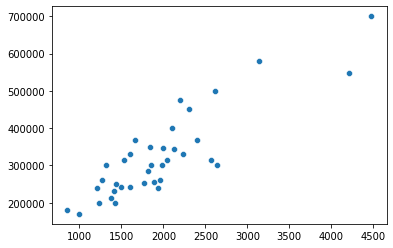

In [84]:
sns.scatterplot(X_train.reshape(-1), y_train.reshape(-1))

> Now fit a linear regression model to our data (use the Scikit-Learn implementation)

In [88]:
# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We can access the model parameters the following way:

In [86]:
theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]

print("Theta0", theta0)
print("Theta1", theta1)

Theta0 59771.494447654
Theta1 134.3574322465645


## Frage 4
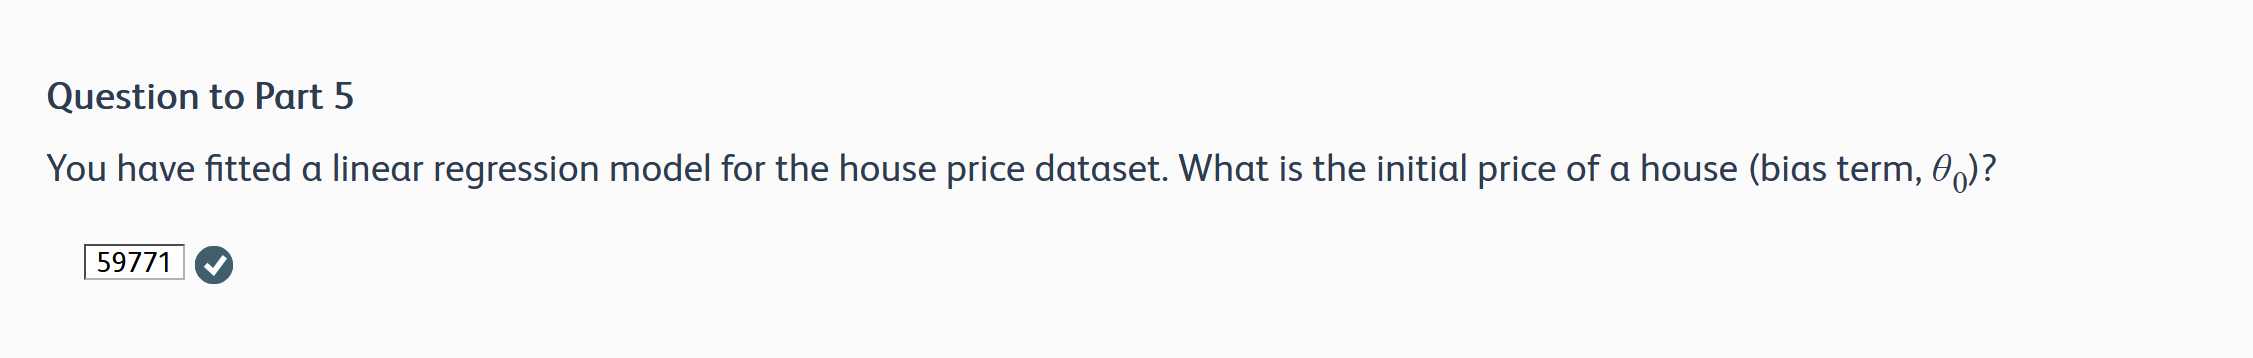

## Frage 5
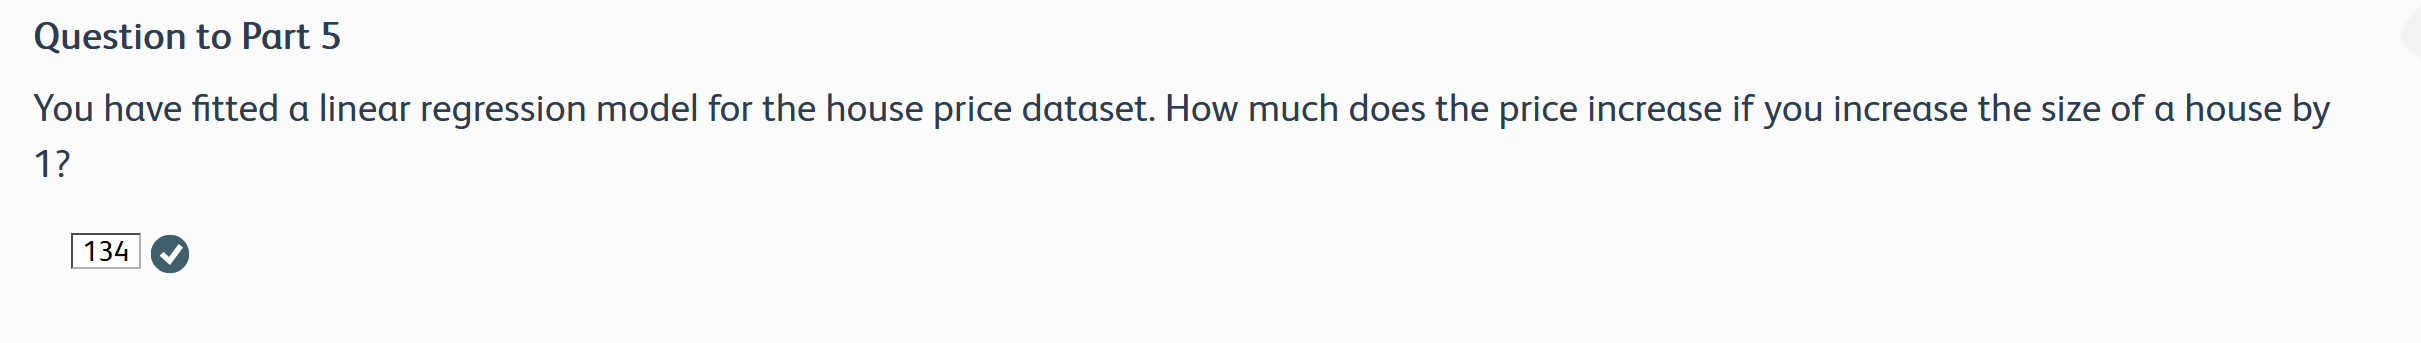

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


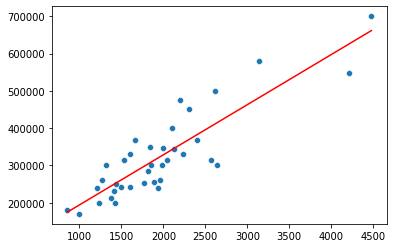

In [87]:
def plot_regression_line(X, model, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.arange(X.min(), X.max()+0.1, 0.01).reshape(-1,1)
    y_pred = model.predict(x)
    
    ax.plot(x, y_pred, color="r")
    
ax = sns.scatterplot(X_train.reshape(-1), y_train.reshape(-1))
plot_regression_line(X_train, model, ax)

> Compute the 99% confidence interval for $\theta_1$

\begin{equation}
s_{\theta_{0}} = \sqrt{MSE} \cdot \sqrt{\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}}
\end{equation}

\begin{equation}
s_{\theta_{1}} = \sqrt{MSE}\cdot \sqrt{\frac{1}{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}}
\end{equation}

In [94]:
# Compute the 99% confidence interval 

def SSE(y, y_pred):
    return np.sum((y - y_pred)**2)


def MSE(y, y_pred):
    SSE_ = SSE(y, y_pred)
    MSE = SSE_ / (len(y)-2)
    return MSE

# Get mean of x
x_mean = np.mean(X_train)
print(x_mean)

# Predict values of y
y_pred = model.predict(X_train)

# Calculate mean squared error
mse = MSE(y_train, y_pred)

print(mse)
print(theta0)
print(theta1)

# calculate standard deviations
n = len(X_train)
S_theta0 = np.sqrt(mse)*np.sqrt((1/len(x))+(x_mean**2)/(np.sum((x - x_mean)**2)))
S_theta1 = np.sqrt(mse) * np.sqrt(1 / (np.sum(x - x_mean) ** 2))

print('S_theta0:', S_theta0)
print('S_theta1:', S_theta1)

t.ppf(0.99, n-2)

alpha = 0.01
ts_theta_0 = t.interval(1 - alpha, n - 2, loc=theta0, scale=S_theta0)
ts_theta_1 = t.interval(1 - alpha, n - 2, loc=theta1, scale=S_theta1)
print(ts_theta_0)
print(ts_theta_1)

1960.4324324324325
3313439098.767962
59771.494447654
134.3574322465645
S_theta0: 11915.381545213277
S_theta1: 0.6283750694552114
(27316.31159725566, 92226.67729805234)
(132.6458607202634, 136.0690037728656)


> Compute the $R^2$ on the test set

In [89]:
# compute the R^2 score
y_pred = model.predict(X_test)
R2 = r2(y_test, y_pred)
print ("R^2: ", R2)


R^2:  0.526301453884142


## Frage 6
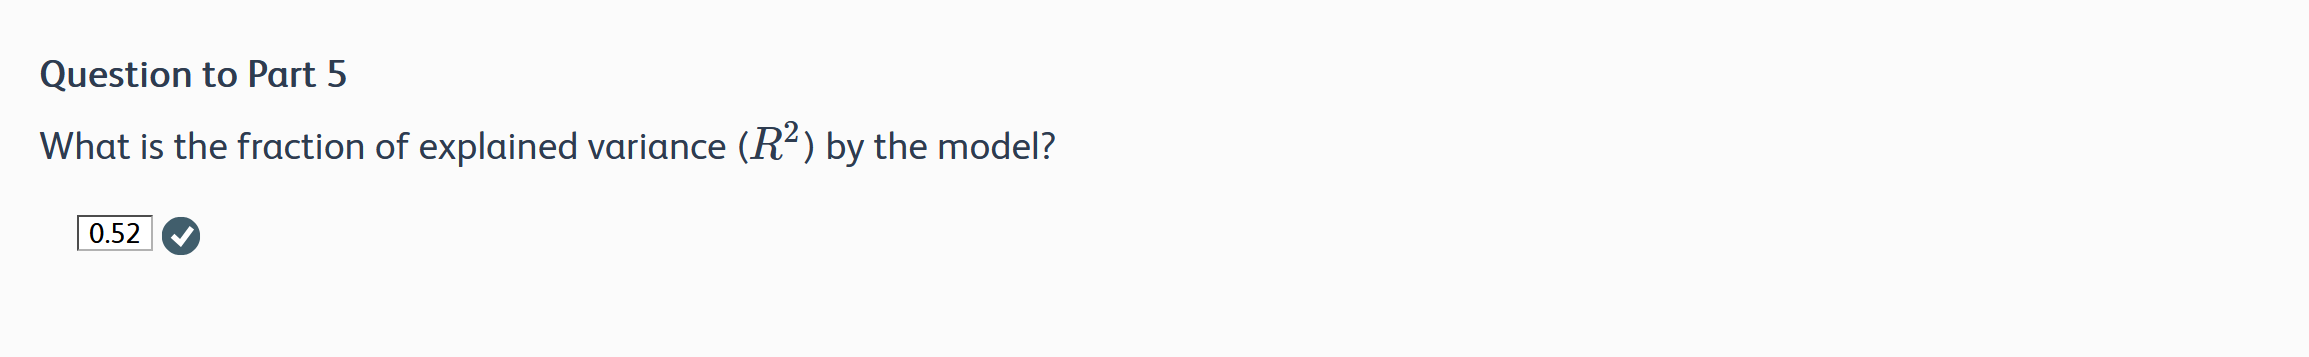